# CREDIT CARD FRAUD DETECTION

#     Importing packages

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data
    
        CSV file is loaded using read_csv function available in pandas library

In [3]:
credit_card_data = pd.read_csv(r"creditcard.csv")

# Data preview

        - head() function for top 5 records
        - tail() function for bottom 5 records

In [4]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


 # Dataframe information
 
     - info() is used to get the datatypes used for all the features available inside the dataframe

In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Finding out null values count

    - isnull() will find out the null values present in the column
    - sum() will count the number of null values

In [7]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Checking for values distribution

    - Class feature is divided into 2 values (0,1)
    - '0' represents normal transaction
    - '1' represents fraudulent transaction

# Pie chart depicting the distribution

<Axes: ylabel='Class'>

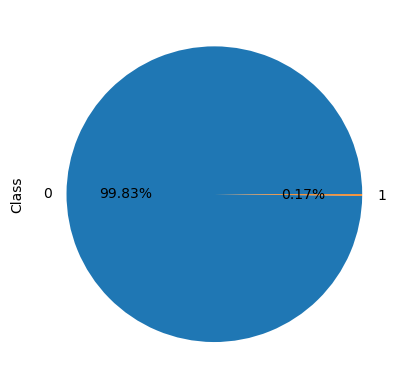

In [22]:
credit_card_data['Class'].value_counts().plot(kind = 'pie',autopct = '%0.2f%%')

    - Since the distribution is almost completely onesided, the machine learning model wont be able to give accurate results and hence to imporve the performance we have to do undersampling for normal transaction

# Splitting the sample into 2

    - legit represents normal transaction and fraud represents fraud transactions

In [21]:
legit = credit_card_data[credit_card_data['Class'] == 0]
legit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
fraud = credit_card_data[credit_card_data['Class'] == 1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


# Checking the shape before undersampling

    - shape function will give an idea regarding the rows and columns present

In [23]:
legit.shape

(284315, 31)

In [25]:
fraud.shape

(492, 31)

# Statistical measures
    
    - describe() will provide all the statistical measures required for further analysis

In [27]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Considering only one feature

    - groupby function is applied on the dataframes on mean function for comparison of values between those 2 values present in class

In [32]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Undersampling

          - Sample() is used to reduce the normal transaction size to match the fraud transaction so that model accuracy is improved.

In [33]:
legit_sample = legit.sample(n = 492)

In [35]:
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213046,139091.0,-1.710877,-1.088153,1.064336,-2.434791,0.021350,0.212278,0.169013,-1.222957,-0.418015,...,0.442274,-1.697913,-3.934843,0.437843,-0.392013,-0.741436,0.335026,-0.192236,656.12,0
272462,165099.0,1.875350,-0.266212,-1.543067,-0.076832,1.044693,1.305598,-0.222484,0.370766,0.345639,...,0.402674,1.465320,0.052933,-1.794021,-0.017025,0.035836,0.052882,-0.086699,1.00,0
120404,75817.0,-2.679508,-1.789557,1.359933,-0.102893,-0.160774,-0.726746,-0.056751,0.471291,-1.641526,...,0.130867,-0.416395,0.303023,-0.179840,0.613254,-0.404190,-0.104186,-0.242710,275.00,0
280432,169524.0,-0.386235,1.307794,-0.412811,0.863843,0.736535,-0.343720,0.970162,0.289359,-1.092314,...,0.234337,0.672342,-0.258044,-0.395592,-0.017570,-0.385554,0.058333,0.105418,22.80,0
35594,38187.0,1.041595,0.074272,1.456792,2.687112,-0.715870,0.606484,-0.672206,0.352407,0.248660,...,-0.057142,-0.069209,0.068381,0.050589,0.185018,-0.012965,0.049201,0.033956,21.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46880,42970.0,-0.549507,1.955393,0.683519,2.260061,0.911455,-1.343706,1.405206,-0.345606,-1.847429,...,0.018776,0.007540,-0.214049,0.765575,0.222039,-0.020328,-0.091074,0.105023,7.55,0
253236,156156.0,2.150617,-0.056796,-2.383864,0.016803,0.734580,-1.152764,0.655500,-0.462599,0.244636,...,0.007970,0.029262,-0.095427,-0.962534,0.306098,0.792512,-0.137210,-0.090730,28.90,0
266438,162332.0,-5.166084,4.467225,-4.610480,-1.287275,-1.002809,0.696899,-1.975931,3.626630,0.910132,...,-0.328617,-0.891838,0.538306,-1.106885,0.170359,0.292371,0.642611,0.366706,9.99,0
23392,32734.0,-1.293767,0.682588,0.222578,-1.956859,-0.383277,-0.747184,0.378234,0.023940,-0.349798,...,0.105294,0.743980,-0.198815,0.000390,-0.049489,-0.302691,0.832658,0.530997,48.00,0


# Concatenation

    - combining the legit_sample and fraud dataframes into one.
    - concatenation is done with axis = 0 , represents based on rows

In [36]:
new_credit_data = pd.concat([legit_sample,fraud],axis = 0)

In [37]:
new_credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213046,139091.0,-1.710877,-1.088153,1.064336,-2.434791,0.021350,0.212278,0.169013,-1.222957,-0.418015,...,0.442274,-1.697913,-3.934843,0.437843,-0.392013,-0.741436,0.335026,-0.192236,656.12,0
272462,165099.0,1.875350,-0.266212,-1.543067,-0.076832,1.044693,1.305598,-0.222484,0.370766,0.345639,...,0.402674,1.465320,0.052933,-1.794021,-0.017025,0.035836,0.052882,-0.086699,1.00,0
120404,75817.0,-2.679508,-1.789557,1.359933,-0.102893,-0.160774,-0.726746,-0.056751,0.471291,-1.641526,...,0.130867,-0.416395,0.303023,-0.179840,0.613254,-0.404190,-0.104186,-0.242710,275.00,0
280432,169524.0,-0.386235,1.307794,-0.412811,0.863843,0.736535,-0.343720,0.970162,0.289359,-1.092314,...,0.234337,0.672342,-0.258044,-0.395592,-0.017570,-0.385554,0.058333,0.105418,22.80,0
35594,38187.0,1.041595,0.074272,1.456792,2.687112,-0.715870,0.606484,-0.672206,0.352407,0.248660,...,-0.057142,-0.069209,0.068381,0.050589,0.185018,-0.012965,0.049201,0.033956,21.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


# New dataframe value count

    - Value_counts() is used to find the number of values present for that particular value in a feature
    - After undersampling the values are similar

In [38]:
new_credit_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

       - Similarly groupby is again performed on the new dataframe, we have to compare values between the previous dataframe and new dataframe, if it matches then the random sampling is fine.

In [39]:
new_credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95719.178862,-0.013852,0.001201,-0.082545,0.001784,0.021105,0.019723,0.045413,-0.006164,0.034529,...,-0.021010,-0.007035,0.009781,-0.012481,0.017233,-0.025865,-0.003784,-0.023130,0.031992,87.834126
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Model building

    - Again spliting the dataframe into input and output variable, 'X' has all the input values to perform the modelling and 'Y' has all the output values to check and compare after the training is completed.
    - Class feature is dropped from the dataframe in X variable.
    - A copy of the dataframe is created with only Y as feature

In [40]:
X = new_credit_data.drop('Class',axis = 1)

In [41]:
Y = new_credit_data['Class']

# Data splitting

    - X_train variable is used for fitting the data in modelling and training the data.
    - X_test variable is used to access the test results after the training is completed.
    - Similarly for Y_train and Y_test.
    - test_size attribute will determine how much data to be provided to train and test.
    -stratify ensure that the class distribution of the target variable (or labels) is preserved in the training and testing sets or folds.
    - random_state parameter helps ensure that the data split remains consistent across different runs of your code, making your results reproducible.

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2,stratify= Y ,random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Logistic  Regression

    - Model variable is created with LogisticRegression function

In [44]:
Reg_model = LogisticRegression()

# Fitting

    - X_train and Y_train variables are fitted inside the model 

In [45]:
Reg_model.fit(X_train,Y_train)

LogisticRegression()

# Accuracy score for X train

    - Predict function is used to store the label of X_train values inside x_predict_train variable.
    - accuracy_score function will compare that label with the Y_train and produce the accuracy score of the model

In [46]:
X_predict_train = Reg_model.predict(X_train)
X_train_accuracy = accuracy_score(X_predict_train,Y_train)

    - Since the accuracy score is above 80% it is categorised as accurate result.

In [47]:
X_train_accuracy

0.9186785260482846

# Accuracy score for X test

In [48]:
X_predict_test = Reg_model.predict(X_test)
X_test_accuracy = accuracy_score(X_predict_test,Y_test)

    - Since the accuracy score is above 80% it is categorised as accurate result.

In [49]:
X_test_accuracy

0.9086294416243654